# GUIDELINE
## Last:
> * Spline basis generation with new lib (patsy)
> * new shapes no get_data ('scale' maybe required pra fazer os splines)
> * Melhorar o parsing do get data para implementar o sliding window (train,test split) 
## Next:
> * Implementar PCA trad (PCA + OLS)
> * Entender a metrica de comparação (p/ F e Lambda)
> * Simulação de dados calibrados c real data ?
> * plotar as resultantes das somas das splines
> * usar o J com formula no sieve

In [1]:
%matplotlib inline 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# info
info = pd.read_csv('./data/info_charact.csv', index_col = 0)
char_names = info.iloc[:, 0]
file_names = np.array([str(x) + '.csv' for x in info.index.values])
d = len(info)-1

In [3]:
# New idea : sliding window average
# X_train = [start,final] and X_test = [start+1,final+1]
# i.e. for each time input X, we average a composed target range including itself

# disc: for Y_test we only care about Y_test[-1] (returns for the target month)
def get_data(start_date: int = 0, final_date: int = 24, shape: str = '') -> tuple[pd.DataFrame, pd.DataFrame] :
    
    parse = lambda  x : pd.read_csv(f'./data/{x}', index_col = 0, parse_dates = True)
    
    # filter NaN values 
    data_list = [parse(file).iloc[start_date:final_date+1, :] for file in file_names if file != '44.csv']
    asset_names = set.intersection(*[set(df.dropna(axis=1).columns.values) for df in data_list])
    
    # get features 
    X_train = pd.DataFrame(data=[df[asset_names].iloc[:-1,:].mean() for df in data_list], index=list(char_names[:-1])).T
    X_test = pd.DataFrame(data=[df[asset_names].iloc[1:,:].mean() for df in data_list], index=list(char_names[:-1])).T
    
    # get returns [range]
    Y = parse('44.csv')[asset_names].T
    Y_train, Y_test = Y.iloc[:, start_date:final_date], Y.iloc[:, start_date+1:final_date+1]
    
    # choice of shapes'
    # normalize (column ~ [0 mean, 1 std])
    if shape == 'norm':
        norm  = lambda x : (x-x.mean())/x.std()
        X_train, X_test = norm(X_train), norm(X_test)
    
    # scale (column ~ [0,1] range)
    elif shape == 'scale':
        scale = lambda x : (x-x.min())/(x.max()-x.min())
        X_train, X_test = scale(X_train), scale(X_test)
     
    
    return X_train, X_test, Y_train, Y_test

X_train, X_test, Y_train, Y_test = get_data(0,24, 'scale')
display(X_train)
display(Y_train)
display(Y_test.iloc[:,-1].to_frame())

/tmp/ipykernel_47846/4094337961.py:15: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X_train = pd.DataFrame(data=[df[asset_names].iloc[:-1,:].mean() for df in data_list], index=list(char_names[:-1])).T
/tmp/ipykernel_47846/4094337961.py:15: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X_train = pd.DataFrame(data=[df[asset_names].iloc[:-1,:].mean() for df in data_list], index=list(char_names[:-1])).T
/tmp/ipykernel_47846/4094337961.py:15: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X_train = pd.DataFrame(data=[df[asset_names].iloc[:-1,:].mean() for df in data_list], index=list(char_names[:-1])).T
/tmp/ipykernel_47846/4094337961.py:15: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X_train = pd.DataFrame(data=[df[a

,size,valueAnnual,piotroski,debtIssue,shareIssue,assetGrowth,assetTurnover,divYld,earningsToPrice,cashFlowToMarket,...,idioVol,beta,seasonality,indRelativeReversal,indMomRev,compositeIssuance,price,firmAge,shareVol,benchmarkWeight
2684703,0.000000,0.103409,0.497297,1.000000,0.537421,0.346879,0.562193,0.220017,0.189183,0.118687,...,0.690145,0.383509,0.671431,0.514489,0.503595,0.252030,0.764692,1.000000,0.321208,0.994858
2670519,0.418154,0.580904,0.628052,0.708333,0.650469,0.759484,0.312065,0.665048,0.651471,0.775824,...,0.701114,0.961349,0.430902,0.537772,0.656562,0.098067,0.465874,1.000000,0.233489,0.738372
2892090,0.670594,0.310969,0.615461,0.000000,0.444241,0.229324,0.665969,0.441044,0.349375,0.277915,...,0.255618,0.117942,0.680282,0.668643,0.628779,0.548448,0.597896,0.355385,0.759114,0.341406
2909730,0.896354,0.973908,0.634992,0.708333,0.619088,0.837087,0.853499,0.610111,0.654152,0.917347,...,0.391688,0.785660,0.187645,0.648961,0.545990,0.711367,0.099075,1.000000,0.355057,0.119503
2280220,0.614968,0.943783,0.611462,0.208333,0.697685,0.763307,0.260623,0.987510,0.909208,0.965285,...,0.919284,0.881055,0.307806,0.499854,0.627256,0.091253,0.672285,1.000000,0.644439,0.446748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BM5M5Y3,0.133864,0.364724,0.498694,0.208333,0.518135,0.417265,0.750393,0.357313,0.519223,0.557371,...,0.608769,0.315485,0.594366,0.564001,0.520655,0.108609,0.587709,1.000000,0.244352,0.852504
2434209,0.000000,0.143624,0.803522,0.500000,0.374516,0.179835,0.923995,0.202013,0.169573,0.111879,...,0.495728,0.124347,0.652848,0.642247,0.570096,0.544012,0.804115,0.543077,0.379172,0.955725
2680905,0.672564,0.782041,0.812012,0.000000,0.876251,0.599206,0.327038,0.841158,0.932523,0.950894,...,0.634930,0.877864,0.316619,0.366662,0.577558,0.090692,0.265382,1.000000,0.203429,0.432894
2842255,0.489329,0.315116,0.667556,0.500000,0.290729,0.304843,0.829854,0.000000,0.232959,0.296217,...,0.273303,0.249874,0.714348,0.346790,0.264578,0.677152,0.075329,0.173846,0.545465,0.504655


,1999-12-31,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,...,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30
2684703,-0.105172,0.115607,-0.109926,0.138133,0.152137,0.059971,0.077139,-0.101563,0.004983,0.039017,...,-0.000897,-0.090000,0.057387,-0.007026,-0.066216,0.029213,-0.068116,0.046724,0.044888,0.036334
2670519,0.055028,0.201439,-0.100753,-0.011725,0.130509,0.059804,-0.082504,0.058915,0.134647,0.256809,...,0.089644,0.003518,0.052591,-0.011798,-0.054556,-0.118840,-0.026094,-0.183150,-0.056727,0.070675
2892090,0.152459,-0.170869,-0.135135,0.307626,-0.130792,-0.161651,0.109120,0.014815,0.215328,-0.072638,...,-0.169957,-0.122854,0.189725,0.066625,0.048676,-0.025400,-0.117563,-0.303727,0.080369,0.231295
2909730,-0.064748,-0.157693,-0.243804,0.078788,-0.061798,-0.050131,-0.113924,0.071429,-0.015704,0.088436,...,-0.069896,0.068200,0.022272,-0.071847,-0.277080,0.118350,0.028219,-0.050237,-0.022954,0.228805
2280220,-0.027932,0.098814,-0.131295,-0.017504,0.117773,0.059387,-0.102436,0.026585,0.107569,0.116250,...,0.028904,0.110832,0.053267,0.066794,0.050307,-0.090224,0.024615,0.006311,-0.031591,-0.009355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BM5M5Y3,0.150442,-0.185577,-0.034088,0.240491,-0.015826,-0.025159,-0.025853,-0.008493,0.072929,0.109109,...,0.042113,-0.059171,0.065211,0.069879,-0.120634,0.001911,-0.065242,-0.320175,0.158924,0.121411
2434209,0.302288,-0.176363,0.020971,0.116551,-0.124031,-0.136062,0.023885,0.036295,-0.070505,0.104032,...,-0.118257,0.015099,0.092807,0.046497,-0.054850,0.082062,-0.086989,-0.164962,-0.003648,0.221653
2680905,0.003403,0.013661,-0.132076,0.055175,0.140299,-0.010471,-0.060845,0.230770,0.240740,0.255348,...,0.089154,-0.032354,0.251137,0.085636,-0.074583,-0.182182,-0.036238,-0.243282,0.047546,0.041581
2842255,-0.087059,0.319588,0.097656,0.275801,-0.325314,0.124548,0.123162,-0.018003,-0.023333,0.093857,...,-0.046308,-0.108924,-0.088071,0.008785,0.178280,-0.215653,-0.064855,-0.114404,0.145916,0.035047


,2001-12-31
2684703,-0.079889
2670519,0.073302
2892090,0.094270
2909730,-0.039901
2280220,0.028212
...,...
BM5M5Y3,0.073588
2434209,0.093462
2680905,-0.012747
2842255,0.075056


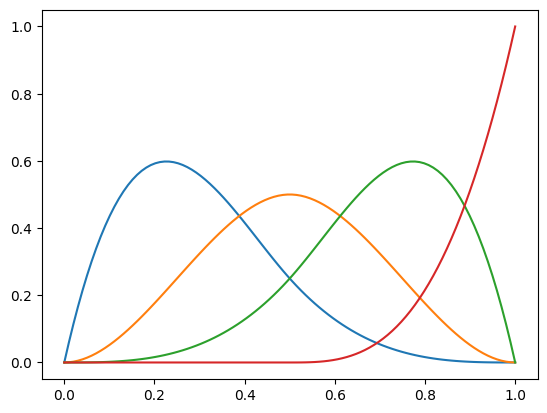

,"bs(x, df=J, degree=3)[0]","bs(x, df=J, degree=3)[1]","bs(x, df=J, degree=3)[2]","bs(x, df=J, degree=3)[3]"
0,0.000000e+00,0.000000,0.000000,0.000000e+00
1,4.434526e-01,0.055314,0.002212,0.000000e+00
2,2.540759e-01,0.499956,0.245968,0.000000e+00
3,0.000000e+00,0.000000,0.000000,1.000000e+00
4,1.979641e-01,0.492017,0.309600,4.192296e-04
5,4.997581e-01,0.388045,0.083477,0.000000e+00
6,1.678330e-01,0.478717,0.351526,1.924506e-03
7,5.978740e-01,0.205242,0.021301,0.000000e+00
8,5.856668e-01,0.160574,0.013542,0.000000e+00
9,4.819701e-01,0.071145,0.003344,0.000000e+00


In [4]:
# pt.1 ~ SIEVE METHOD (goal: projector P)

from patsy import bs, dmatrix, build_design_matrices, DesignMatrix

# generate spline basis functions
def spline_basis(J:int) -> DesignMatrix :
    
    x = np.linspace(0, 1, 100)  
    spl = dmatrix("bs(x, df=J, degree=3) - 1", {"x":x})
    
    return spl 

# evaluate splines at data points
def spline_eval(spl: DesignMatrix, X:pd.DataFrame) -> list[pd.DataFrame]:
    
    # evaluate at X_{i,l} (i<p, l<d)
    spl_eval = [pd.DataFrame(build_design_matrices([spl.design_info], {"x":X_row}, return_type='dataframe')[0]) for X_row in np.asarray(X)]
    
    return spl_eval

def phi(spl: DesignMatrix, X:pd.DataFrame) -> np.ndarray:
    
    spl_eval = spline_eval(spl, X)
    
    return np.asarray([np.asarray(spl_eval[i]).flatten() for i in range(X.shape[0])])

# get / plot spline basis
spl = spline_basis(J=4)
plt.plot(np.linspace(0, 1, 100), spl)
plt.show()

# spline evaluation on X 
spl_eval = spline_eval(spl, X_train)
display(spl_eval[0]) # 0 -> first stock

# create PHI matrix as described in the article
PHI = phi(spl, X_train)

# projector
P = np.linalg.multi_dot([PHI, np.linalg.inv(PHI.transpose().dot(PHI)),PHI.transpose()])

In [5]:
# line added for simplification (until other issues are resolved)
Y = Y_train

1.6327456143655665e-28


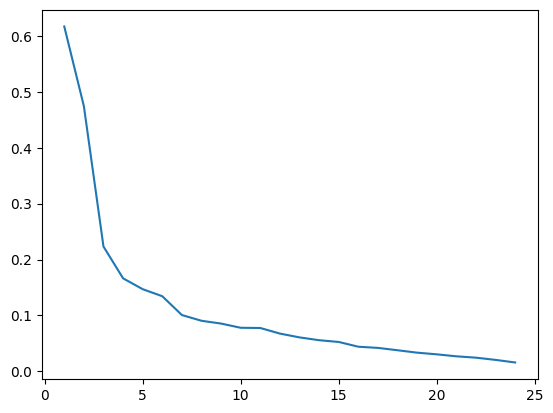

estimated K = 2


In [6]:
# pt.2 ~ PCA (goal: loading factors F)

def PCA(M : np.ndarray, K : int = 0, plot:bool = False) -> np.ndarray :
    
    # get eigenvalues and eigenvectors
    values, vectors = np.linalg.eig(M)
    print(np.linalg.det(M)) 

    # sort by eigenvalues (decreasing)
    ind = np.argsort(values)[::-1]
    values, vectors = values[ind], vectors[ind]
    
    # plot eigenvalues
    if plot : 
        plt.plot(np.arange(1,1+len(ind)), values)
        plt.show()
    
    # estimate K
    if not K:
        K = 1 + np.argmax([values[i]/values[i+1] for i in range(len(values)-1)])
        print(f"estimated K = {K}")
        
    # return K first eigenvectors
    return np.asarray(vectors[:,:K])

# calculate loading factors
T = Y.shape[1]
F = PCA(1/T*np.linalg.multi_dot([Y.T, P, Y]), plot=True)*np.sqrt(T)

In [7]:
# pt.3 ~ remaining estimations (goal: GAMA and B)

# est. gamma
GAMMA = 1/T*np.linalg.multi_dot([np.identity(len(P))-P, Y, F])

# est. B
B = 1/T*np.linalg.multi_dot([np.linalg.inv(PHI.transpose().dot(PHI)),PHI.transpose(), Y, F])

In [11]:
# pt.4 ~ predictions 

predict = lambda X : (phi(spl, X) @ B + GAMMA) @ F.transpose()

# in sample
Y_pred = predict(X_train)
Y_pred = pd.DataFrame(data=Y_pred, columns=Y.columns, index=Y.index)
print(f'Estimations in sample {Y_train.columns[0]} ~ {Y_train.columns[-1]}')
display(Y_pred)

# next date (month)
Y_pred = predict(X_test)
Y_pred = pd.DataFrame(data=Y_pred, columns=Y_test.columns, index=Y.index)
print(f'Estimations for {Y_test.columns[-1]}')
display(pd.DataFrame(data=[Y_test.iloc[:,-1], Y_pred.iloc[:,-1]], index=['True', 'Pred']).T)

(189, 2)
Estimations in sample 1999-12-31 00:00:00 ~ 2001-11-30 00:00:00


,1999-12-31,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,...,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30
2684703,-0.017298,-0.030060,-0.073480,0.082438,0.021153,0.024431,-0.045735,0.023006,0.013265,0.035488,...,0.025472,-0.031368,0.005641,0.030497,-0.007716,0.013526,-0.024439,0.020676,0.011228,0.043197
2670519,-0.004514,-0.027233,-0.054935,0.079207,0.014080,0.017087,-0.035865,0.020053,0.018091,0.028061,...,0.032129,-0.039188,0.011480,0.035156,-0.010694,0.011160,-0.021246,0.017036,0.001307,0.040590
2892090,0.050581,-0.047872,-0.035551,0.162959,-0.001916,0.003568,-0.033838,0.031112,0.063653,0.027880,...,0.103957,-0.125371,0.053590,0.101283,-0.038225,0.013879,-0.032654,0.021055,-0.044198,0.078990
2909730,-0.099697,-0.053110,-0.201913,0.117619,0.068879,0.074437,-0.115311,0.045536,-0.014197,0.088040,...,-0.011092,0.011314,-0.029506,0.007232,0.009320,0.030678,-0.048723,0.047036,0.074771,0.067296
2280220,-0.028492,-0.018288,-0.063440,0.042869,0.021058,0.022991,-0.036793,0.015267,-0.001711,0.028176,...,0.000918,-0.001740,-0.006827,0.006430,0.001271,0.009991,-0.016309,0.015310,0.021108,0.023935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BM5M5Y3,0.040786,-0.051535,-0.052520,0.169887,0.004165,0.010022,-0.043247,0.034459,0.061085,0.035022,...,0.100823,-0.121772,0.049888,0.099812,-0.036613,0.016281,-0.036248,0.024742,-0.036722,0.083250
2434209,0.089718,-0.013762,0.068170,0.077326,-0.034809,-0.032979,0.027796,0.003627,0.059221,-0.019539,...,0.090882,-0.108608,0.058327,0.079842,-0.035946,-0.003382,-0.003358,-0.005372,-0.072440,0.032520
2680905,0.019114,-0.051501,-0.075056,0.161002,0.014026,0.019806,-0.054023,0.035967,0.049263,0.042932,...,0.083195,-0.100800,0.037498,0.085143,-0.029404,0.018394,-0.037961,0.028015,-0.019499,0.080371
2842255,-0.007390,-0.002843,-0.012950,0.005465,0.004623,0.004913,-0.007198,0.002583,-0.001877,0.005466,...,-0.002259,0.002587,-0.002751,-0.000998,0.001180,0.001844,-0.002773,0.002830,0.005634,0.003335


Estimations for 2001-12-31 00:00:00


,True,Pred
2684703,-0.079889,0.081780
2670519,0.073302,0.061430
2892090,0.094270,0.111114
2909730,-0.039901,0.131267
2280220,0.028212,0.033758
...,...,...
BM5M5Y3,0.073588,0.103697
2434209,0.093462,0.073560
2680905,-0.012747,-0.015810
2842255,0.075056,-0.042895


In [9]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

K = 3
pca = PCA(n_components = K).fit(X_train)


# pca.expained_variance_ratio_
# OLS over this 'factors'



In [10]:
# # constant's functions for spline basis gen

# import math

# def partie_positive(n,x):
#     if x < 0:
#         return 0
#     elif x == 0 and n == 0:
#         return 0.5
#     elif x > 0 and n == 0:
#         return 1
#     elif x >= 0 and n>= 1:
#         return x**n

# def b_spline(n,x):
#     somme = 0
#     for k in range(n+2):
#         somme += (-1)**k * (n+1)/(math.factorial(n+1-k)*math.factorial(k)) * partie_positive(n,x-k+(n+1)/2)

#     return somme

# J = 10
# ordre = 3
# l, r = -3.2, 4.2
# phi_x = []

# for i in range(X.shape[0]):
#     phi_x_i = []
#     for l in range(X.shape[1]):
#         for j in range(J):
#             phi_x_i.append(b_spline(ordre,X.iloc[i,l]-l+j*(r-l)/(J-1)))
#     phi_x.append(phi_x_i)

# PHI = np.array(phi_x)
# # PHI = np.transpose(phi_x)

# #P = np.linalg.multi_dot([PHI, np.linalg.inv(np.dot(PHI.transpose(), PHI)),PHI.transpose()])

# pd.DataFrame(PHI, index=X.index.values)